#**Bisa AI Academy Project** <br>
**Master Class and On the Job Training Data Science<br>
Review Application of Bisa Tampil <br>
Pearly Tantra**

---
This project was done in fulfillment of the requirements for Masterclass and On the Job Training Program of Data Science that was provided by Bisa AI Academy in Batch 7. The program is focused on the sentiment data visualization from the users that have rated and reviewed. Not only visualizing, but also modelling of the sentiment analysis.
<br>
<br>
*I am not allowed to share the dataset to the public but I am permitted to publish the program that I have made.*

**Connecting Google Colab with Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

#**Importing Dataset**<br>
data source : Bisa AI Academy<br>
dataset directory in gdrive : *'/content/gdrive/My Drive/Project BisaAI/'* 

**Arranging name files with the directory**

In [3]:
# creating a list of 202007 - 202108
file_2020 = list(range(202005,202013)) #int
file_2021 = list(range(202101,202110)) #int

format = '.csv'

# converting integer to string
file_2020_str = [str(x) for x in file_2020]
file_2021_str = [str(x) for x in file_2021]

# adding the format in the end
data_2020 = [x + format for x in file_2020_str]
data_2021 = [x + format for x in file_2021_str]

# adding the path directory in the beginning
list_2020 = (['/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_{0}'.format(i) for i in data_2020])
list_2021 = (['/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_{0}'.format(i) for i in data_2021])

# extending all the list
all_data = list_2021 + list_2020
all_data

['/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202101.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202102.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202103.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202104.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202105.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202106.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202107.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202108.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202109.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202005.csv',
 '/content/gdrive/My Drive/Project BisaAI/reviews_reviews_com.pos.bisatampil_202006.csv',
 '/content

**Looping all CSV files in the directory**

In [4]:
np_array_list = []
for file in all_data:
    df = pd.read_csv(file,index_col=None, header=0, encoding='utf-16')
    np_array_list.append(df.to_numpy())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

big_frame.columns=['Package Name', 'App Version Code', 'App Version Name',
       'Reviewer Language', 'Device', 'Review Submit Date and Time',
       'Review Submit Millis Since Epoch', 'Review Last Update Date and Time',
       'Review Last Update Millis Since Epoch', 'Star Rating', 'Review Title',
       'Review Text', 'Developer Reply Date and Time',
       'Developer Reply Millis Since Epoch', 'Developer Reply Text',
       'Review Link']

big_frame.head(5)

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.pos.bisatampil,19,2.0.0.4,id,m20lte,2021-01-01T12:20:28Z,1609503628962,2021-01-01T12:20:28Z,1609503628962,1,NaN,Apk tipu² sertifikat nya juga ga muncul² walau...,NaN,NaN,NaN,http://play.google.com/console/developers/5503...
1,com.pos.bisatampil,NaN,NaN,id,merlin,2021-01-02T09:07:57Z,1609578477670,2021-01-02T09:07:57Z,1609578477670,5,NaN,NaN,NaN,NaN,NaN,NaN
2,com.pos.bisatampil,26,2.0.1.0,en,1807,2021-01-02T10:08:59Z,1609582139173,2021-01-02T10:08:59Z,1609582139173,5,NaN,Really helpfull,2021-01-13T04:52:53Z,1.61051e+12,"Hai Kak Valentino Stania, Terima kasih atas ul...",http://play.google.com/console/developers/5503...
3,com.pos.bisatampil,27,2.0.1.1,id,OP4EFDL1,2021-01-03T02:35:10Z,1609641310932,2021-01-03T02:35:10Z,1609641310932,5,NaN,NaN,NaN,NaN,NaN,NaN
4,com.pos.bisatampil,26,2.0.1.0,en,olive,2021-01-04T05:22:04Z,1609737724837,2021-01-04T05:22:04Z,1609737724837,5,NaN,Useful app.,2021-01-13T04:52:43Z,1.61051e+12,"Hai Kak Dzulfikri Falah, Terima kasih atas ula...",http://play.google.com/console/developers/5503...


**Filtering necessary columns**

In [5]:
data = big_frame[['Star Rating','Review Submit Date and Time','Review Text']]
data.head()

,Star Rating,Review Submit Date and Time,Review Text
0,1,2021-01-01T12:20:28Z,Apk tipu² sertifikat nya juga ga muncul² walau...
1,5,2021-01-02T09:07:57Z,NaN
2,5,2021-01-02T10:08:59Z,Really helpfull
3,5,2021-01-03T02:35:10Z,NaN
4,5,2021-01-04T05:22:04Z,Useful app.


#**Data Cleaning**

**Dropping Duplicate Values**<br>
For any data of users who rated but didn't write any review, will be eliminated, as this model will be focused for the sentiment analysis based on the review text the users gave.

In [6]:
data1 = data.dropna()
new_data = data1.reset_index(drop=True)
new_data

,Star Rating,Review Submit Date and Time,Review Text
0,1,2021-01-01T12:20:28Z,Apk tipu² sertifikat nya juga ga muncul² walau...
1,5,2021-01-02T10:08:59Z,Really helpfull
2,5,2021-01-04T05:22:04Z,Useful app.
3,5,2021-01-04T06:41:39Z,Oke
4,5,2021-01-07T10:30:22Z,Aplikasi berfungsi dengan baik
...,...,...,...
182,5,2020-12-23T12:39:49Z,ManTulPis 🌟🌟🌟🌟🌟
183,2,2020-12-27T03:49:26Z,Pas udh diupdate malah keluar trus dia
184,5,2020-12-27T12:06:32Z,Well
185,5,2020-12-29T11:17:56Z,Semoga dapat E-sertifikat gratis 🤭


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Star Rating                  187 non-null    object
 1   Review Submit Date and Time  187 non-null    object
 2   Review Text                  187 non-null    object
dtypes: object(3)
memory usage: 4.5+ KB


**Converting data to the right type of value**

In [8]:
star_rating = new_data.loc[:,"Star Rating"].astype(int)
time = pd.DataFrame(new_data.loc[:,'Review Submit Date and Time'].apply(pd.to_datetime))
review_text = pd.DataFrame(new_data.loc[:,'Review Text'].astype(str))

In [9]:
new_data = pd.concat ([time.reset_index(drop=True), star_rating.reset_index(drop=True), review_text.reset_index(drop=True)],axis=1)
new_data

,Review Submit Date and Time,Star Rating,Review Text
0,2021-01-01 12:20:28+00:00,1,Apk tipu² sertifikat nya juga ga muncul² walau...
1,2021-01-02 10:08:59+00:00,5,Really helpfull
2,2021-01-04 05:22:04+00:00,5,Useful app.
3,2021-01-04 06:41:39+00:00,5,Oke
4,2021-01-07 10:30:22+00:00,5,Aplikasi berfungsi dengan baik
...,...,...,...
182,2020-12-23 12:39:49+00:00,5,ManTulPis 🌟🌟🌟🌟🌟
183,2020-12-27 03:49:26+00:00,2,Pas udh diupdate malah keluar trus dia
184,2020-12-27 12:06:32+00:00,5,Well
185,2020-12-29 11:17:56+00:00,5,Semoga dapat E-sertifikat gratis 🤭


In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Review Submit Date and Time  187 non-null    datetime64[ns, UTC]
 1   Star Rating                  187 non-null    int64              
 2   Review Text                  187 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 4.5+ KB


**Adding sentiment column**<br>
Rating 4 - 5 are considered as Positive, 3 is neutral, 1 -2 are Negative


In [11]:
sentiment =[]
for _, row in new_data.iterrows():
  if row['Star Rating'] >= 4 :
    sentiment.append('Positive')
  elif row['Star Rating'] == 3:
    sentiment.append('Neutral')
  else:
    sentiment.append('Negative')

new_data['Sentiment'] = sentiment
new_data.head(10)

,Review Submit Date and Time,Star Rating,Review Text,Sentiment
0,2021-01-01 12:20:28+00:00,1,Apk tipu² sertifikat nya juga ga muncul² walau...,Negative
1,2021-01-02 10:08:59+00:00,5,Really helpfull,Positive
2,2021-01-04 05:22:04+00:00,5,Useful app.,Positive
3,2021-01-04 06:41:39+00:00,5,Oke,Positive
4,2021-01-07 10:30:22+00:00,5,Aplikasi berfungsi dengan baik,Positive
5,2021-01-12 03:31:59+00:00,2,Sedih banget baru update udah ga bisa di buka ...,Negative
6,2021-01-12 05:18:51+00:00,5,Mantap,Positive
7,2021-01-14 07:03:52+00:00,5,Sangat ringan,Positive
8,2021-01-14 07:07:22+00:00,5,"One of the best meeting video conference,i app...",Positive
9,2021-01-15 08:12:41+00:00,1,Begitu di instal udah masukin email dan passwo...,Negative


#**Preprocessing Data**

In [12]:
pip install nltk

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Sastrawi**<br>
A simple library of Indonesian language to convert all verbs and words into the most basic word.<br>
Concretely, all sentences that are listed in column 'Review Text' will be converted into the simplest sentences

In [15]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 5.5 MB/s 


**Importing Libraries**

In [16]:
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.probability import FreqDist

import re

**Function to converting sentences into the basic form**

In [17]:
def convert_sentences(sentence):
  # stemming process : convert sentence to the most basic word
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  sentence = stemmer.stem(sentence)

  # dropping numbers and punctuations from sentences
  sentence = re.sub (r'\d+','',sentence) # numbers
  sentence = re.sub(r'[^\w\s]',' ', sentence) # punctuations

  # dropping stopwords that don't have meaning
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  sentence = stopword.remove(sentence)

  # converting multiple white space into single space
  sentence = re.sub(r'\s+', ' ', sentence)
  return sentence


**Examples**

In [18]:
example = 'Saya tidak suka makan makanan yang terlalu manis2  ini!'
print(convert_sentences(example))

tidak suka makan makan terlalu manis


**Reconstructing New Data with converted texts**

In [19]:
new_data['Converted Text'] = new_data.apply(lambda row: convert_sentences(row['Review Text']), axis=1)

In [20]:
new_data

,Review Submit Date and Time,Star Rating,Review Text,Sentiment,Converted Text
0,2021-01-01 12:20:28+00:00,1,Apk tipu² sertifikat nya juga ga muncul² walau...,Negative,apk tipu sertifikat nya ga muncul udah bayar
1,2021-01-02 10:08:59+00:00,5,Really helpfull,Positive,really helpfull
2,2021-01-04 05:22:04+00:00,5,Useful app.,Positive,useful app
3,2021-01-04 06:41:39+00:00,5,Oke,Positive,oke
4,2021-01-07 10:30:22+00:00,5,Aplikasi berfungsi dengan baik,Positive,aplikasi fungsi baik
...,...,...,...,...,...
182,2020-12-23 12:39:49+00:00,5,ManTulPis 🌟🌟🌟🌟🌟,Positive,mantulpis
183,2020-12-27 03:49:26+00:00,2,Pas udh diupdate malah keluar trus dia,Negative,pas udh diupdate malah keluar trus
184,2020-12-27 12:06:32+00:00,5,Well,Positive,well
185,2020-12-29 11:17:56+00:00,5,Semoga dapat E-sertifikat gratis 🤭,Positive,moga e sertifikat gratis


#**Data Visualization**

**Bar Chart Visualization : Star Rating through timeline**

In [21]:
import plotly.express as px

In [22]:
graph1 = pd.DataFrame(new_data.sort_values(by=['Star Rating']))

fig = px.histogram(graph1, x='Review Submit Date and Time', template='plotly_white', title='Star Rating Counts by Date'
                   , color='Star Rating', log_y=True, barmode='group', color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Star Rating Counts')
fig.show()

**Bar Chart Visualization : Top 20 frequent words with its value**

In [23]:
top_N = 20
a = new_data['Converted Text'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)

result = pd.DataFrame(word_dist.most_common(top_N), columns = ['Word', 'Freq'])


<FreqDist with 656 samples and 1982 outcomes>


In [24]:
fig = px.bar(result,  x ='Word' , y='Freq', title='Counts of top 20 most used words', template = 'plotly_white')
fig.show()

**World Cloud Visualization**

In [25]:
from wordcloud import WordCloud

Featured words in Positive Sentiment: 


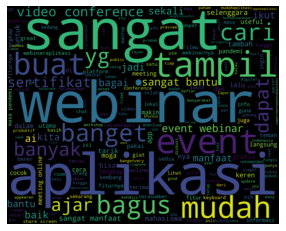

Featured words in Neutral Sentiment: 


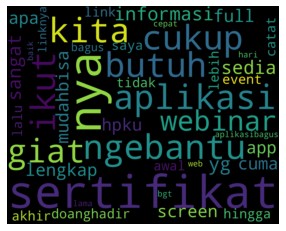

Featured words in Negative Sentiment: 


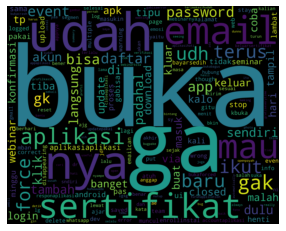

In [26]:
def visualizer (sentiment):
  words =''
  for msg in new_data[new_data['Sentiment']==sentiment]['Converted Text']:
      msg.lower()
      words+=msg + ''
  wordcloud = WordCloud(width = 2500, height=2000).generate(words)
    
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

print('Featured words in Positive Sentiment: ')
visualizer('Positive')
print('Featured words in Neutral Sentiment: ')
visualizer('Neutral')
print('Featured words in Negative Sentiment: ')
visualizer('Negative')


**Circular Bart Chart Visualization**

In [27]:
# assigning a new variable to 'new_data'
new_data_1 = new_data

# splitting the sentence function into words
def splitting_sentence (sentence):
  words = sentence.split(' ')
  return words

# adding a column of Words with dictionary type
new_data_1['Words'] = new_data_1.apply(lambda row : splitting_sentence(row['Converted Text']), axis=1)

# dropping unncessary column
new_data_1.drop(['Review Text','Review Submit Date and Time','Review Text','Converted Text'], axis =1, inplace=True)

# exploding list in word frequency column into separate rows
new_data_1 = new_data_1.explode('Words')

In [28]:
# giving a dummy value of 1 as a counter
new_data_1 ['counter'] = 1

# grouping by 'Star Rating' and 'Word'
grouped_data = pd.DataFrame(new_data_1.groupby(['Sentiment', 'Words'], as_index=False)['counter'].count())

# assigning a new variable grouped_data_1 
# and clearing the missing value
grouped_data_1 = grouped_data[ grouped_data['Words'] != '' ]

In [29]:
grouped_data_1

,Sentiment,Words,counter
1,Negative,account,1
2,Negative,ada,2
3,Negative,ae,1
4,Negative,ajar,1
5,Negative,ajg,1
...,...,...,...
782,Positive,worth,1
783,Positive,ya,1
784,Positive,yg,12
785,Positive,you,1


In [30]:
# Filtering 50 Top Words for 3 sentiments

top_20_positive = grouped_data_1.loc[grouped_data_1['Sentiment']=='Positive']
top_20_positive_1 = pd.DataFrame(top_20_positive.sort_values('counter', ascending = False).values[:17], columns=['Sentiment','Words','counter'])

top_20_negative = grouped_data_1.loc[grouped_data_1['Sentiment']=='Negative']
top_20_negative_1 = pd.DataFrame(top_20_negative.sort_values('counter', ascending = False).values[:16], columns=['Sentiment','Words','counter'])

top_20_neutral = grouped_data_1.loc[grouped_data_1['Sentiment']=='Neutral']
top_20_neutral_1 = pd.DataFrame(top_20_neutral.sort_values('counter', ascending = False).values[:17], columns=['Sentiment','Words','counter'])

top_20_sentiment = pd.concat([top_20_positive_1,top_20_negative_1,top_20_neutral_1]).reset_index()
del top_20_sentiment['index']

In [31]:
# Reconstructing the columns of the dataframe
column_names = ['Words','counter','Sentiment']
top_20_sentiment = top_20_sentiment.reindex (columns=column_names)
top_20_sentiment

,Words,counter,Sentiment
0,aplikasi,80,Positive
1,sangat,61,Positive
2,webinar,50,Positive
3,event,36,Positive
4,tampil,36,Positive
5,banget,23,Positive
6,bagus,22,Positive
7,mudah,22,Positive
8,keren,21,Positive
9,manfaat,20,Positive


In [32]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [33]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

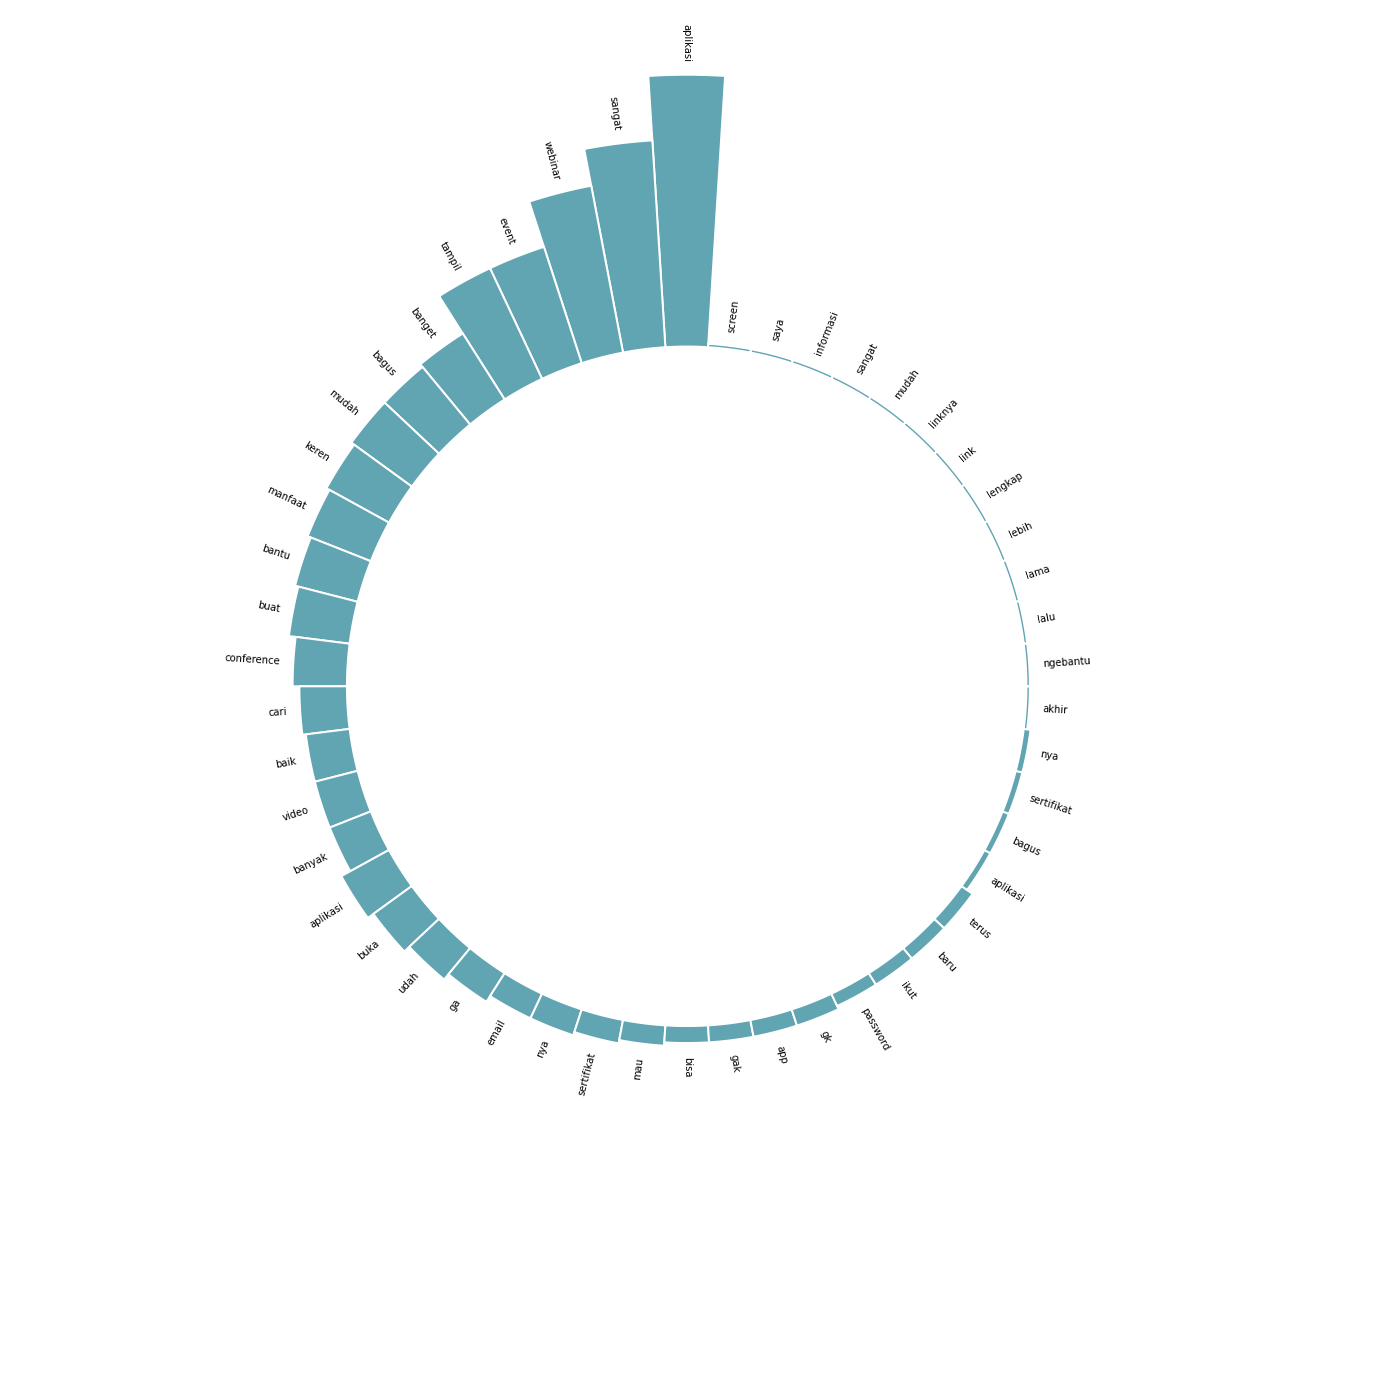

In [34]:
ANGLES = np.linspace(0, 2 * np.pi, len(top_20_sentiment), endpoint=False)
VALUES = top_20_sentiment['counter'].to_numpy()
LABELS = top_20_sentiment['Words'].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(30, 25), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

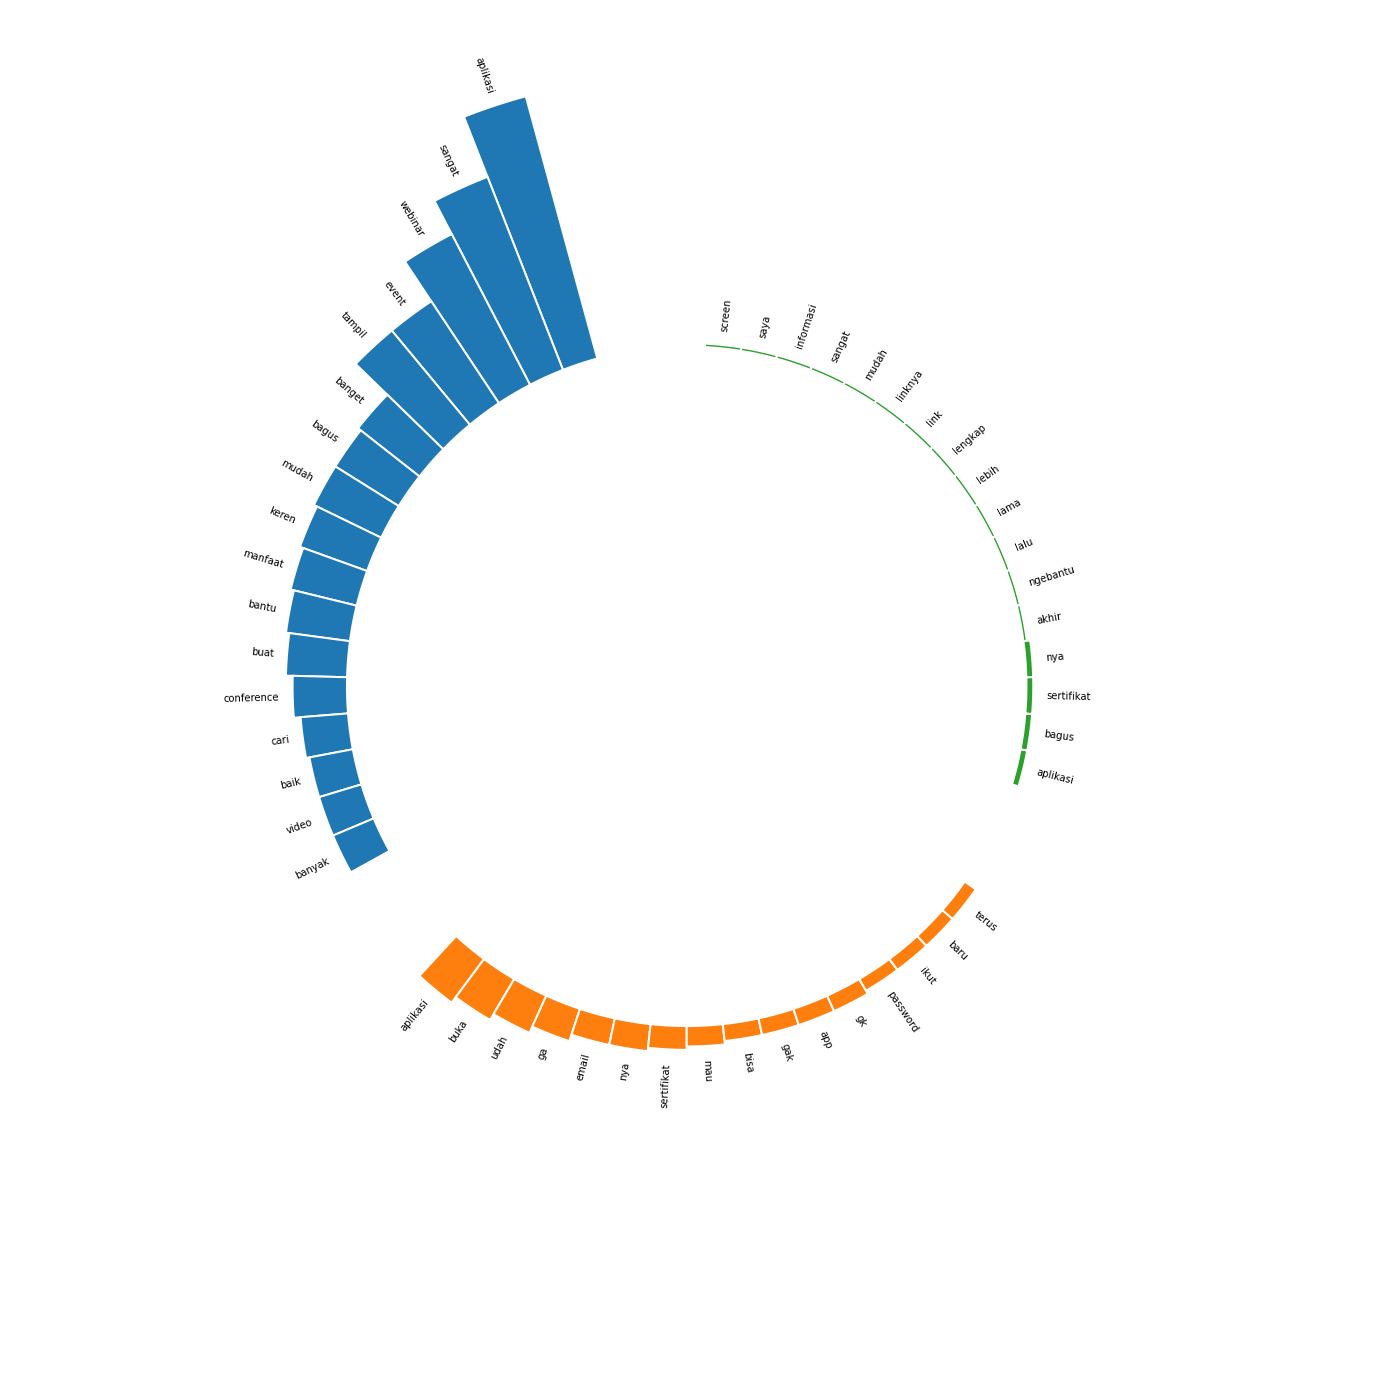

In [35]:
# Grab the group values
GROUP = top_20_sentiment["Sentiment"].values

# Add 3 empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [17, 16, 17]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(30, 25), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [17, 16, 17]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

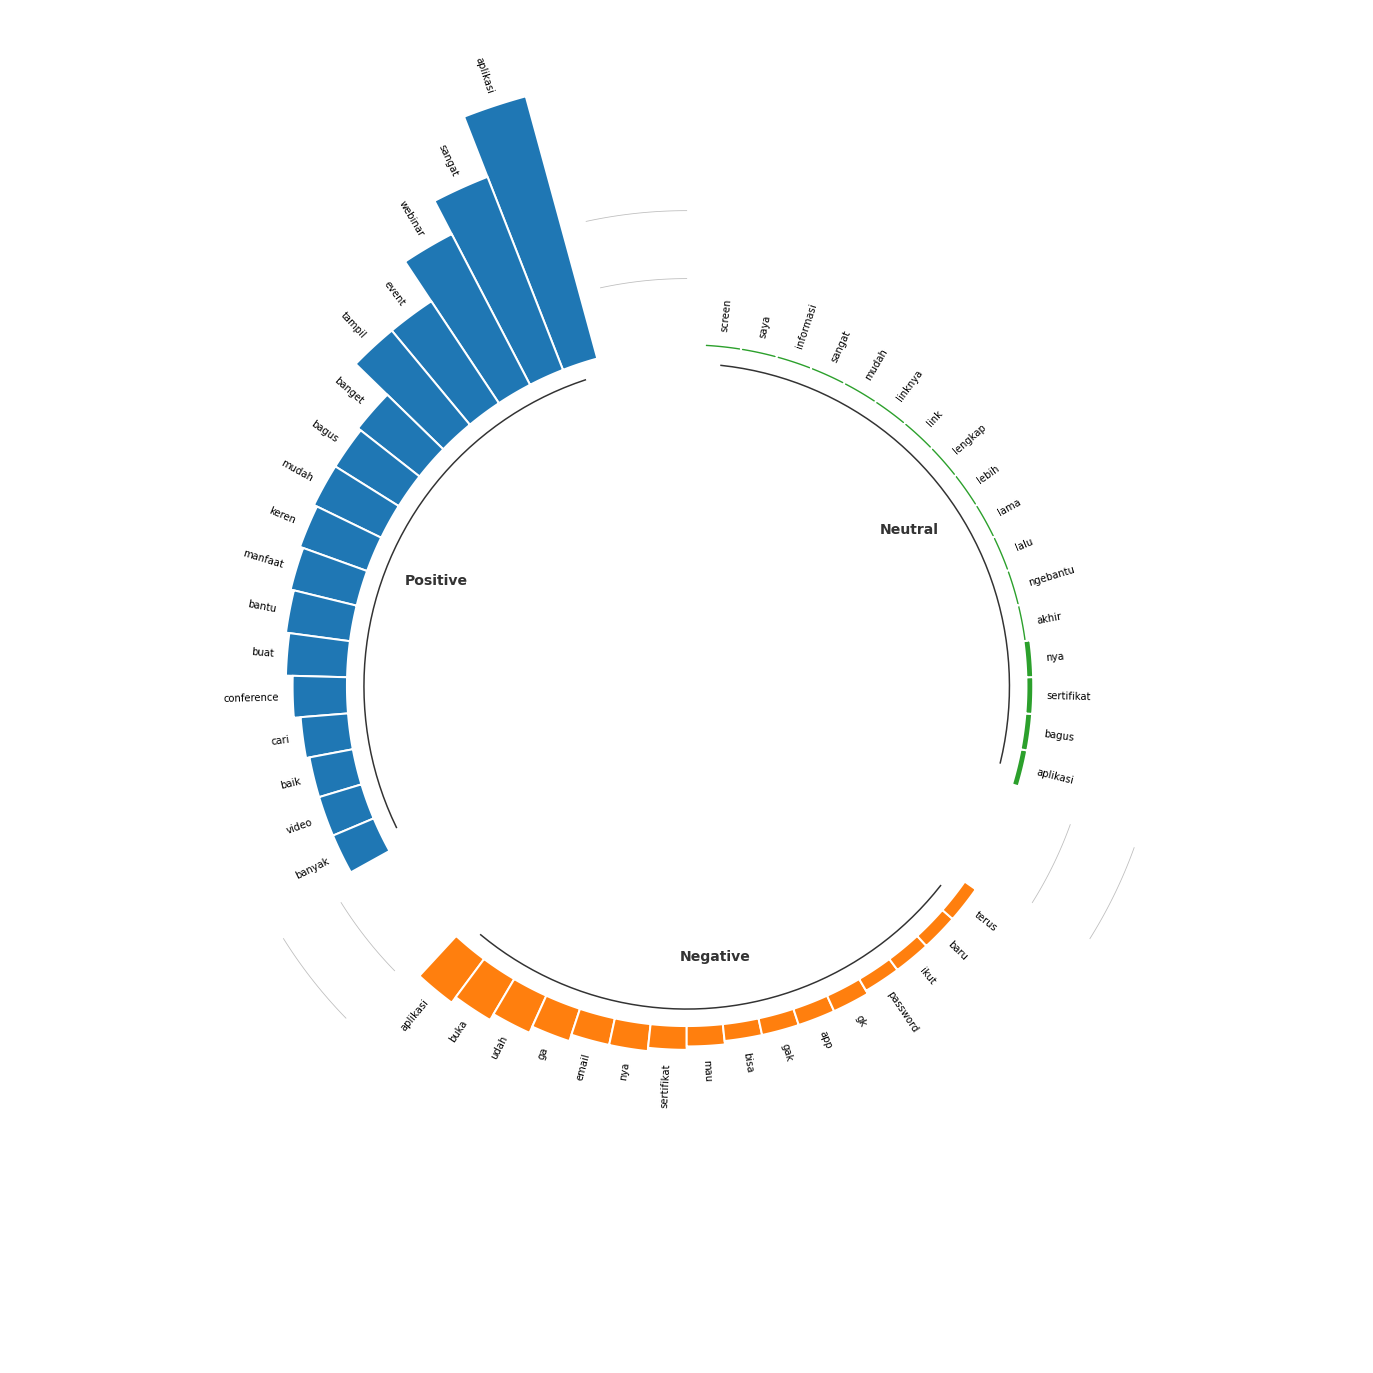

In [36]:
# All this part is like the code above
VALUES = top_20_sentiment['counter'].to_numpy()
LABELS = top_20_sentiment['Words'].values
GROUP = top_20_sentiment["Sentiment"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [17, 16, 17]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(30, 25), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [17, 16, 17]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["Positive", "Negative", "Neutral"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    
    
    offset += size + PAD

# **Modelling**

**Data distribution for each sentiment**

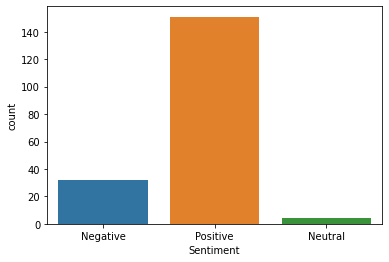

In [37]:
sns.countplot(x='Sentiment', data=new_data)

'Neutral' Sentiment (Star Rating 3) will be considered as 'negative' sentiment becauses this sentiment analysis will only be focused on differentiating positive and negative reviews.


In [38]:
new_data

,Star Rating,Sentiment,Words
0,1,Negative,"[apk, tipu, sertifikat, nya, ga, muncul, udah,..."
1,5,Positive,"[really, helpfull]"
2,5,Positive,"[useful, app]"
3,5,Positive,[oke]
4,5,Positive,"[aplikasi, fungsi, baik]"
...,...,...,...
182,5,Positive,[mantulpis]
183,2,Negative,"[pas, udh, diupdate, malah, keluar, trus]"
184,5,Positive,[well]
185,5,Positive,"[moga, e, sertifikat, gratis]"


**Reconstructing DataFrame for Modelling**
<br>
It seems the new_data in the column 'Words' has been converted to the split_text sentence, so we might need to reprocess the big_frame again, and also, we need to reconstruct the sentiment


In [39]:
data1 = data.dropna()
data_sentiment = data1.reset_index(drop=True)
data_sentiment.drop(['Review Submit Date and Time'], axis =1, inplace=True)

Rating = data_sentiment.loc[:,"Star Rating"].astype(int)
Reviewtext = pd.DataFrame(data_sentiment.loc[:,'Review Text'].astype(str))

data_sentiment = pd.concat ([Rating.reset_index(drop=True), Reviewtext.reset_index(drop=True)],axis=1)
data_sentiment.reset_index(drop=True)

,Star Rating,Review Text
0,1,Apk tipu² sertifikat nya juga ga muncul² walau...
1,5,Really helpfull
2,5,Useful app.
3,5,Oke
4,5,Aplikasi berfungsi dengan baik
...,...,...
182,5,ManTulPis 🌟🌟🌟🌟🌟
183,2,Pas udh diupdate malah keluar trus dia
184,5,Well
185,5,Semoga dapat E-sertifikat gratis 🤭


In [40]:
# adding sentiment while above 4 is positive and below 4 is negative
sentiment =[]
for _, row in data_sentiment.iterrows():
  if row['Star Rating'] >= 4 :
    sentiment.append('Positive')
  else:
    sentiment.append('Negative')
data_sentiment['Sentiment'] = sentiment

# converting the review text into the most basic form of sentence
data_sentiment['Converted Text'] = data_sentiment.apply(lambda row: convert_sentences(row['Review Text']), axis=1)

# deleting the review text
data_sentiment.drop(['Review Text'], axis =1, inplace=True)


In [41]:
# adding the column integer for sentiment :
# 1 for negative sentiment
# and 0 for positive sentiment
data_sentiment ['label'] = data_sentiment['Sentiment'].map({'Positive':0, 'Negative':1})
data_sentiment

,Star Rating,Sentiment,Converted Text,label
0,1,Negative,apk tipu sertifikat nya ga muncul udah bayar,1
1,5,Positive,really helpfull,0
2,5,Positive,useful app,0
3,5,Positive,oke,0
4,5,Positive,aplikasi fungsi baik,0
...,...,...,...,...
182,5,Positive,mantulpis,0
183,2,Negative,pas udh diupdate malah keluar trus,1
184,5,Positive,well,0
185,5,Positive,moga e sertifikat gratis,0


**Data Distribution which Rating 3 is added to negative sentiment** <br>
As the data shown below, there might be a bias in the model where the number for each sentiments have a huge difference.

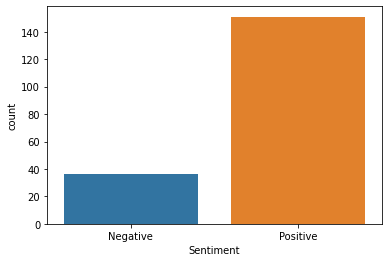

In [42]:
sns.countplot(x='Sentiment', data=data_sentiment)

**Determining the X input and Y output for the model**

In [43]:
X_cleaned = data_sentiment['Converted Text']
X_cleaned

0           apk tipu sertifikat nya ga muncul udah bayar
1                                        really helpfull
2                                             useful app
3                                                    oke
4                                   aplikasi fungsi baik
                             ...                        
182                                            mantulpis
183                   pas udh diupdate malah keluar trus
184                                                 well
185                             moga e sertifikat gratis
186    bagus web nya sertifikat nya lama bgt cepat ba...
Name: Converted Text, Length: 187, dtype: object

In [44]:
y = data_sentiment['label']
y

0      1
1      0
2      0
3      0
4      0
      ..
182    0
183    1
184    0
185    0
186    1
Name: label, Length: 187, dtype: int64

#**Tokenizing**

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)
X = tokenizer.texts_to_sequences(X_cleaned)
vocab_size = len(tokenizer.word_index)+1

print("Vocab size: {}".format(vocab_size))
print("\nExample: \n")
print("Sentence:\n{}".format(X_cleaned[2]))
print("\nAfter tokenizing:\n{}".format(X[2]))

X = pad_sequences(X, padding = "post", maxlen=45)
print("\nAfter padding:\n{}".format(X[2]))

Vocab size: 657

Example: 

Sentence:
useful app

After tokenizing:
[29, 15]

After padding:
[29 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


#**Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 10)

#**Parameter for Modelling**

In [49]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [50]:
epochs = 5
batch_size = 10
embedding_dim = 10
units = 5

In [51]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    L.LSTM(units),
    L.Dense(10,activation="sigmoid"),
    L.Dense(2,activation="softmax")
])

In [52]:
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 45, 10)            6570      
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 320       
_________________________________________________________________
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 6,972
Trainable params: 6,972
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test,y_test), batch_size = batch_size)

Epoch 1/5
14/14 [==============================] - 3s 47ms/step - loss: 0.5703 - accuracy: 0.8000 - val_loss: 0.5341 - val_accuracy: 0.8298
Epoch 2/5
14/14 [==============================] - 0s 14ms/step - loss: 0.5430 - accuracy: 0.8000 - val_loss: 0.5105 - val_accuracy: 0.8298
Epoch 3/5
14/14 [==============================] - 0s 12ms/step - loss: 0.5262 - accuracy: 0.8000 - val_loss: 0.4936 - val_accuracy: 0.8298
Epoch 4/5
14/14 [==============================] - 0s 13ms/step - loss: 0.5151 - accuracy: 0.8000 - val_loss: 0.4799 - val_accuracy: 0.8298
Epoch 5/5
14/14 [==============================] - 0s 12ms/step - loss: 0.5070 - accuracy: 0.8000 - val_loss: 0.4701 - val_accuracy: 0.8298


# **Predicting Data Test**

In [54]:
predicted = np.argmax(model.predict(X_test),axis=1)
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

2/2 [==============================] - 0s 8ms/step - loss: 0.4701 - accuracy: 0.8298
Test loss: 0.4700843393802643
Test Accuracy: 0.8297872543334961


# **Confusion Matrix**

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
cf = confusion_matrix(y_test,predicted)
cf

array([[39,  0],
       [ 8,  0]])

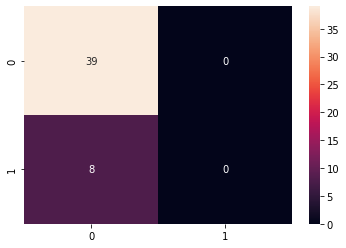

In [57]:
sns.heatmap(cf,annot=True,fmt="d")

#**Classification Report**

In [58]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        39
           1       0.00      0.00      0.00         8

    accuracy                           0.83        47
   macro avg       0.41      0.50      0.45        47
weighted avg       0.69      0.83      0.75        47



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



*References* <br>

---
[Circular Barplot source code (R-graph)](https://www.python-graph-gallery.com/circular-barplot-basic) <br>
[Basic Text Preprocessing - Sastrawi](https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-a4fa52608ffe)
